**<h1>The Spam/Not Spam Mail Classifier</h1>**
The project focuses on developing a machine learning model to automatically identify whether an email is spam or not. By processing and analyzing the text content of emails, the project applies various techniques to convert the data into a format suitable for classification. The goal is to create an effective system that can distinguish between unwanted spam emails and legitimate messages.




### Project Summary:
This project implements a Spam/Not Spam Mail Classifier using different machine learning techniques and text preprocessing methods. The dataset is processed by removing noise, normalizing the text, and applying stemming and spell correction. Several text vectorization methods such as TF-IDF, CountVectorizer, and Word2Vec are applied to convert text data into numeric features. Then, the Naive Bayes classifier is trained to classify the emails, followed by performance evaluation using confusion matrices and accuracy metrics.

### steps included:

1.   **Data Preprocessing:** This section reads and cleans the dataset. It removes unnecessary characters, tokenizes, stems, and autocorrects words. Stop words are removed to focus on meaningful terms in emails.
2.   **Text Vectorization:** Three methods, TF-IDF, CountVectorizer, and Word2Vec, are used to convert text into numerical vectors for classification.
3.   **Model Training:** The Naive Bayes classifier is trained separately on data transformed by each vectorizer.
4.   **Evaluation:** The models are evaluated using confusion matrices and accuracy scores to assess how well each method performs in classifying emails as spam or not spam.










*   **Importing required libraries for text processing, visualization, and machine learning**



In [2]:
# !pip install autocorrect
#!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from autocorrect import Speller



*  **Load dataset from local device**


In [3]:
from google.colab import files
uploaded = files.upload()

In [4]:
data = pd.read_csv('/content/spam.csv')

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Dropping empty columns
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Renaming columns for clarity
data.rename(columns={'v1':'label','v2':'mail'},inplace=True)
data.head()

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."




*   **Visualizing the most frequent words found in spam emails using a word cloud.**

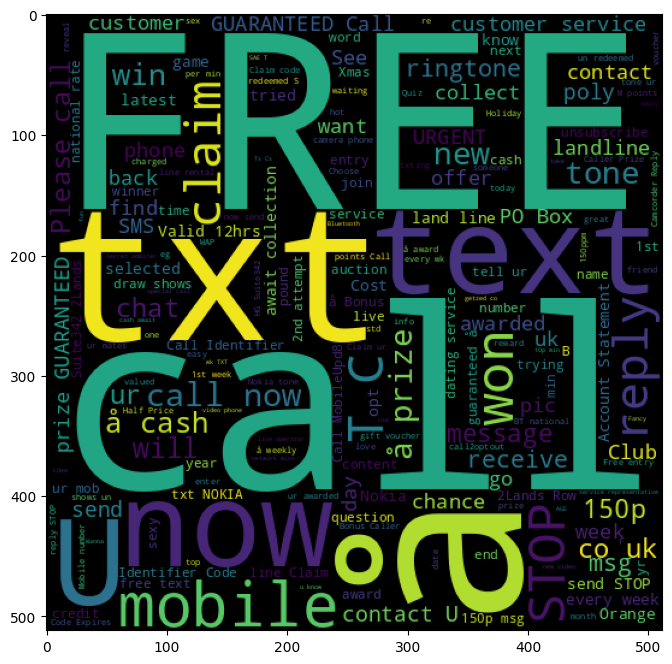

In [9]:
spam_words = "".join(list(data[data['label']=='spam']["mail"]))
spam_wd = WordCloud(width = 512 ,height = 512).generate(spam_words)
plt.figure(figsize = (10,8))
plt.imshow(spam_wd)
plt.show()


*   **Visualizing the most frequent words found in Not spam emails using a word cloud.**

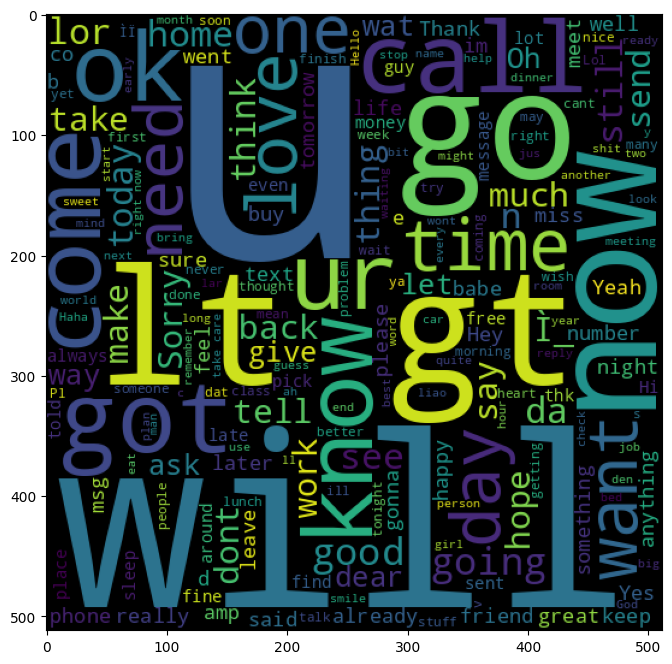

In [10]:
spam_words = "".join(list(data[data['label']=='ham']["mail"]))
spam_wd = WordCloud(width = 512 ,height = 512).generate(spam_words)
plt.figure(figsize = (10,8))
plt.imshow(spam_wd)
plt.show()

In [11]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True



## 1.   Data Preprocessing
  1.   Clean (Remove non-alphabetical characters)
  2.   Tokeninzation
  3.   Remove stopwords
  4.   Stemming and spell correction



In [12]:
from tqdm import tqdm
import re
newdata = []
stemmer = PorterStemmer()
spell = Speller(lang='en')

# Load stop words to filter out common words
stop_words_set = set(stopwords.words('english'))
for i in tqdm( range(len(data))):
  line = data.iloc[i,1]

  # 1-Remove non-alphabetical characters
  line = re.sub('[^A-Za-z]',' ', line)
  # Convert to lowercase
  line = line.lower()
  # 2-Tokenize the text
  line = word_tokenize(line)
  new_line = []

  for word in line:
    # 3-Remove stopwords
    if word not in stop_words_set:
      # 4-Apply stemming and spell correction
      new_line.append(spell(stemmer.stem(word)))
  final_line = ' '.join(new_line)
  newdata.append(final_line)

100%|██████████| 5572/5572 [03:45<00:00, 24.69it/s]


In [13]:
print(newdata[:10])

['go during point crazy avail bugs n great world la e buffet cine got amor wat', 'ok lar joke if u oni', 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply', 'u dun say early hor u c already say', 'nah think go usf live around though', 'frees hey dark week word back like fun still tb ok xxx std chg send rev', 'even brother like speak treat like aid patent', 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun', 'winner value network custom select received prize reward claim call claim code kl valid hour', 'mobil month u r entity update latest colour mobil camera free call mobil update co free']


In [14]:
# Encode labels: Spam = 1, Not Spam = 0
data['label'] = data['label'].apply(lambda x: 1 if x=='spam' else 0)

In [15]:
data.head()

,label,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 2.   Text Vectorization

In [17]:
# Splitting data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdata, data['label'], test_size=0.2, random_state=4)

In [18]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = X_train, X_test, y_train, y_test
X_train_Word2Vec, X_test_Word2Vec, y_train_Word2Vec, y_test_Word2Vec = X_train, X_test, y_train, y_test



  ### **TF-IDF Vectorization**



In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_tfidf).toarray()
X_test_tfidf = vectorizer.transform(X_test_tfidf).toarray()

  ### **CountVectorizer (Bag of Words)**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

 ### **Word2Vec Vectorization**

In [21]:
from gensim.models import Word2Vec
import numpy as np
# Tokenize your text data
X_train_tokens = [sentence.split() for sentence in X_train_Word2Vec]
X_test_tokens = [sentence.split() for sentence in X_test_Word2Vec]

# Train Word2Vec on the training data
w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)
w2v_model.train(X_train_tokens, total_examples=len(X_train_tokens), epochs=10)

# Function to convert a sentence into an average word vector
def sentence_vector(sentence, model, vector_size):
    words = [word for word in sentence if word in model.wv.index_to_key]
    if len(words) == 0:
        return np.zeros(vector_size)
    return np.mean([model.wv[word] for word in words], axis=0)

# Convert training and test sets to vectors
vector_size = 100  # Same as used in the Word2Vec model
X_train_vectors = np.array([sentence_vector(sentence, w2v_model, vector_size) for sentence in X_train_tokens])
X_test_vectors = np.array([sentence_vector(sentence, w2v_model, vector_size) for sentence in X_test_tokens])


## 3.   Model Training



*   **Training Naive Bayes Classifiers for each vectorization method**



In [22]:
from sklearn.naive_bayes import GaussianNB
model_cv = GaussianNB()
model_tfidf = GaussianNB()
model_Word2Vec = GaussianNB()

model_cv.fit(X_train_cv, y_train)
model_tfidf.fit(X_train_tfidf, y_train_tfidf)
model_Word2Vec.fit(X_train_vectors, y_train_Word2Vec)


GaussianNB()

In [49]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
Y_pred_cv = model_cv.predict(X_test_cv)
Y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
Y_pred_Word2Vec = model_Word2Vec.predict(X_test_vectors)

## 4.   Evaluation



*   **Evaluation and Confusion Matrices**



In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm_cv = confusion_matrix(y_test, Y_pred_cv)
print("confusion matrix of CountVectorizer \n",cm_cv)

cm_tfidf = confusion_matrix(y_test_tfidf, Y_pred_tfidf)
print("confusion matrix of TfidfVectorizer \n",cm_tfidf)

cm_Word2Vec = confusion_matrix(y_test_Word2Vec, Y_pred_Word2Vec)
print("confusion matrix of Word2Vec \n",cm_Word2Vec)

print("accuracy of CountVectorizer", accuracy_score(y_test, Y_pred_cv) )
print("accuracy of TfidfVectorizer", accuracy_score(y_test_tfidf, Y_pred_tfidf) )
print("accuracy of Word2Vec", accuracy_score(y_test_Word2Vec, Y_pred_Word2Vec))

confusion matrix of CountVectorizer 
 [[794 147]
 [ 26 148]]
confusion matrix of TfidfVectorizer 
 [[795 146]
 [ 29 145]]
confusion matrix of Word2Vec 
 [[915  26]
 [ 20 154]]
accuracy of CountVectorizer 0.8448430493273542
accuracy of TfidfVectorizer 0.8430493273542601
accuracy of Word2Vec 0.9587443946188341


The results show that *Word2Vec* outperforms both *CountVectorizer* and **TF-IDF** in terms of accuracy, with a significantly higher score of **95.87%** compared to around **84.48%** and **84.30%** for the other two methods.</br>
In contrast, both *CountVectorizer* and *TF-IDF* have similar performance but with a higher number of misclassifications, especially in identifying non-spam emails as spam (false positives). While they are still relatively effective, *Word2Vec* demonstrates superior performance and should be preferred for this classification task.


   ### A simple test on a new data



In [27]:
data = [
    "PDF Conversion in Snipping Tool Desktop Apps (MacOS, Windows, and Linux)",
    "PDF conversion is now available in all Snip desktop apps! Just like in Snip Web, it’s possible to upload multiple files and choose from a variety of formats to convert them into (DOCX, LaTeX, HTML, Markdown, and Mathpix Markdown).",
    "Click the Open in Snip Web icon to the right of each PDF name to open it directly in our web app, where you can view, read, edit, and search through your documents.",
    "Haven’t installed our desktop apps yet? Download them now — available for macOS, Windows, and Linux.",
    "Subject: URGENT You’ve WON a $1,000,000 Prize! Body: Dear User, Congratulations! You are the lucky winner of $1,000,000 in our exclusive lottery! To claim your prize, all you need to do is provide us with your bank account details and we will transfer the money to you immediately. Hurry! This offer is only available for the next 24 hours. Click the link below to claim your reward: Claim Now Thank you, The Prize Giveaway Team"]
datatest = pd.DataFrame(data,columns=['mail'])
datatest

,mail
0,PDF Conversion in Snipping Tool Desktop Apps (...
1,PDF conversion is now available in all Snip de...
2,Click the Open in Snip Web icon to the right o...
3,Haven’t installed our desktop apps yet? Downlo...
4,"Subject: URGENT You’ve WON a $1,000,000 Prize!..."


In [28]:
nd = []

for i in tqdm( range(len(datatest))):
  line = datatest.iloc[i,0]
  print(line)
  line = re.sub('[^A-Za-z]',' ', line)
  line = line.lower()
  line = word_tokenize(line)
  new_line = []
  for word in line:
    if word not in stop_words_set:
      new_line.append(spell(stemmer.stem(word)))
  final_line = ' '.join(new_line)
  nd.append(final_line)

  0%|          | 0/5 [00:00<?, ?it/s]

PDF Conversion in Snipping Tool Desktop Apps (MacOS, Windows, and Linux)
PDF conversion is now available in all Snip desktop apps! Just like in Snip Web, it’s possible to upload multiple files and choose from a variety of formats to convert them into (DOCX, LaTeX, HTML, Markdown, and Mathpix Markdown).


 40%|████      | 2/5 [00:00<00:00,  7.74it/s]

Click the Open in Snip Web icon to the right of each PDF name to open it directly in our web app, where you can view, read, edit, and search through your documents.
Haven’t installed our desktop apps yet? Download them now — available for macOS, Windows, and Linux.
Subject: URGENT You’ve WON a $1,000,000 Prize! Body: Dear User, Congratulations! You are the lucky winner of $1,000,000 in our exclusive lottery! To claim your prize, all you need to do is provide us with your bank account details and we will transfer the money to you immediately. Hurry! This offer is only available for the next 24 hours. Click the link below to claim your reward: Claim Now Thank you, The Prize Giveaway Team


100%|██████████| 5/5 [00:00<00:00, 10.24it/s]


In [30]:
nd

['pdf covers ship tool desktop app mac window linux',
 'pdf covers avail ship desktop app like ship web possible upload multiple file choose variety format convert doc latex html smackdown matrix smackdown',
 'click open ship web icon right pdf name open directly web app view read edit search document',
 'install desktop app yet download avail mac window linux',
 'subject urgent prize body dear user congratul luck winner excess lottery claim prize need provide us bank account detail transfer money immer hurry offer avail next hour click link claim reward claim thank prize giveaway team']

In [31]:
X_test_cv = cv.transform(nd).toarray()
X_test_tfidf = vectorizer.transform(nd).toarray()
X_test_tokens = [sentence.split() for sentence in nd]
X_test_vectors = np.array([sentence_vector(sentence, w2v_model, vector_size) for sentence in X_test_tokens])


In [32]:
Y_pred_cv = model_cv.predict(X_test_cv)
Y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
Y_pred_Word2Vec = model_Word2Vec.predict(X_test_vectors)

In [35]:
print(Y_pred_cv)
print(Y_pred_tfidf)
print(Y_pred_Word2Vec)

[0 0 0 0 1]
[0 0 0 0 1]
[0 0 0 0 1]


#Conclusion
The Spam/Not Spam Mail Classifier project successfully demonstrates the use of machine learning techniques to automate the classification of emails. By applying various text preprocessing and vectorization methods, the project explored different approaches for transforming raw email text into features suitable for classification. The comparison between CountVectorizer, TF-IDF, and Word2Vec models revealed that Word2Vec provided the highest classification accuracy, making it the most effective method for distinguishing between spam and non-spam emails in this context.

Overall, the project highlights the importance of text preprocessing, feature extraction, and model selection in building robust machine learning models for email classification. It also shows how different methods can impact performance, with Word2Vec standing out due to its ability to capture contextual relationships in the data.